In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 한글깨짐 해결
plt.rcParams['font.family'] ="Malgun Gothic"

In [5]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [6]:
data = pd.read_csv("../autoML/automldata.csv", index_col = 0 )

In [7]:
train = data[data['date'] < '2020-09-01']
test = data[data['date'] >= '2020-09-01']

In [8]:
train = train[train['품목'] == '대파']
test = test[test['품목'] == '대파']
cat_f = ['주산지','요일']


setting = setup( data = train ,    target = '1_week' , categorical_features = cat_f,
               ignore_features = ['2_week','4_week','month','품목'] , normalize = True , session_id = 123)

,Description,Value
0,session_id,123
1,Target,1_week
2,Original Data,"(1453, 104)"
3,Missing Values,False
4,Numeric Features,96
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1017, 118)"


In [9]:
best = compare_models(sort = 'MAE' , exclude = ['omp','ard','par','ransac','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,173.4970,81862.7022,284.1790,0.6605,1.0336,0.1102,1.1010
rf,Random Forest Regressor,187.5167,93018.5737,303.8307,0.6135,1.0498,0.1184,1.8680
gbr,Gradient Boosting Regressor,188.5281,86378.9432,292.3202,0.6398,1.0291,0.1231,0.7570
lightgbm,Light Gradient Boosting Machine,190.5168,93574.3107,304.5788,0.6082,1.0551,0.1209,0.3790
lasso,Lasso Regression,212.0042,105810.5953,324.5387,0.5526,1.0445,0.1407,0.0320
br,Bayesian Ridge,214.6667,106909.0122,326.3114,0.5474,1.0539,0.1416,0.0210
ridge,Ridge Regression,218.3093,107412.5977,327.1301,0.5469,1.0412,0.1470,0.0130
llar,Lasso Least Angle Regression,218.8859,118239.5663,342.4696,0.5017,1.0669,0.1445,0.4670
en,Elastic Net,221.7383,118686.7203,343.7644,0.5009,1.0793,0.1448,0.0290
lr,Linear Regression,227.5167,115998.3367,340.0819,0.5109,1.0284,0.1557,0.4460


### Extra Trees Regressor

In [10]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,171.3729,74500.2182,272.9473,0.7285,0.6884,0.1156
1,164.7397,62572.5243,250.1450,0.7785,1.1570,0.1070
2,174.1375,82124.3492,286.5735,0.6789,1.0105,0.1101
3,160.8047,70755.3256,265.9987,0.6093,0.7594,0.1136
4,175.5979,91357.0890,302.2534,0.6782,1.2232,0.1041
5,163.0786,86773.0147,294.5726,0.5597,1.4131,0.0959
6,180.9040,78168.3182,279.5860,0.6215,0.9753,0.1198
7,167.6110,69358.9455,263.3609,0.6891,1.1645,0.1094
8,154.0996,64830.0980,254.6176,0.7403,0.7272,0.0994
9,222.6243,138187.1398,371.7353,0.5212,1.2171,0.1272


In [11]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,184.3368,85881.4905,293.0554,0.6871,0.7087,0.1236
1,187.6296,82076.9781,286.4908,0.7094,1.2126,0.1177
2,184.2738,87916.5054,296.5072,0.6562,1.0084,0.1160
3,174.9560,81762.6534,285.9417,0.5485,0.7697,0.1251
4,189.1445,108064.9626,328.7324,0.6194,1.2536,0.1113
5,187.1519,121703.0265,348.8596,0.3825,1.4596,0.1085
6,199.9758,91874.0441,303.1073,0.5551,1.0333,0.1289
7,190.0319,83428.0479,288.8391,0.6261,1.2193,0.1210
8,168.7732,74828.7876,273.5485,0.7002,0.7249,0.1105
9,236.7717,137790.7218,371.2017,0.5226,1.2409,0.1364


In [12]:
print(tuned_model)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


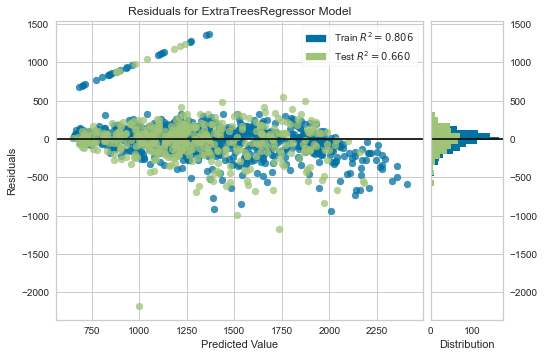

In [13]:
plot_model(tuned_model, plot = 'residuals')

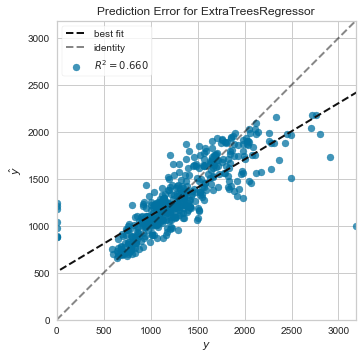

In [14]:
plot_model(tuned_model, plot = 'error')

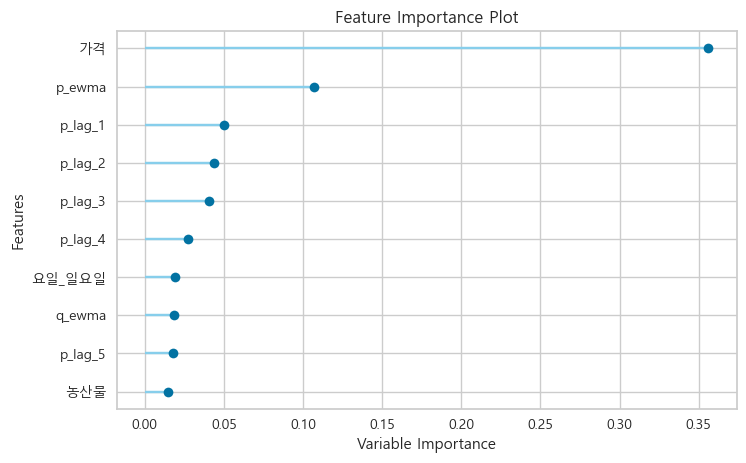

In [17]:
plot_model(tuned_model, plot = 'feature')

In [18]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,178.7092,78313.3881,279.8453,0.6603,0.9528,0.1174


,가격,거래량,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,...,date_month_8,date_month_9,date_weekday_0,date_weekday_2,date_weekday_4,date_weekday_5,date_is_month_end_0,date_is_month_start_1,1_week,Label
0,-0.960107,1.115043,-0.356756,0.752151,-1.378184,-1.193075,-1.553413,-0.922067,-0.212212,1.041916,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,972.0,957.541963
1,2.488904,-0.969435,1.354468,3.283757,1.050949,0.709328,1.328779,0.155211,0.078719,-1.595962,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2331.0,2160.028483
2,-0.914150,-0.759358,-0.629155,-2.138671,1.274069,1.293587,1.281914,-0.922067,-0.212212,-0.160053,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,829.0,1093.947809
3,-0.235727,-0.626368,-0.649051,-2.188671,0.863816,0.402948,1.188184,-0.071584,0.739713,-1.950906,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,913.0,1230.422348
4,1.333398,-0.484936,-1.406057,-1.308398,-2.040348,-2.301029,-1.700703,1.175790,-0.258760,-1.111948,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2707.0,2040.698569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-1.334334,0.792972,0.104285,0.650834,-0.327359,-0.077996,-0.589335,-0.184982,-0.258760,1.243588,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,725.0,773.819019
432,-0.143812,0.277215,0.568690,-0.024174,-2.263468,-2.539720,-1.834602,2.423165,-0.258760,-1.329754,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1919.0,1312.434343
433,-0.653723,-0.551959,0.753963,-0.672865,1.126522,1.339900,1.004072,-0.808669,-0.258760,0.614370,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1510.0,1169.710503
434,-0.820046,-0.490949,1.173480,0.053459,0.439167,0.424324,0.458430,0.211910,-0.258760,-0.143919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,952.0,1028.482022


In [19]:
final_ml = finalize_model(tuned_model)
print(final_ml)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [21]:
unseen_pred = predict_model(final_ml, data = test)
unseen_pred.head()

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,...,w_lag_2m,w_lead_1,w_lead_2,w_lead_3,w_lead_4,p_lead_1,p_lead_2,p_lead_3,p_lead_4,Label
8637,2020-09-01,화요일,대파,1559.0,705184.4,전남,1158.57,139.93,26.766667,31.600000,...,1.133333,2.900000,0.900000,0.633333,0.600000,543761.2,0.0,646667.6,359629.3,1781.257162
8638,2020-09-02,수요일,대파,1678.0,650382.7,전남,1158.51,139.93,25.266667,27.466667,...,0.800000,0.766667,2.900000,0.900000,0.633333,596599.9,543761.2,0.0,646667.6,1797.409736
8639,2020-09-03,목요일,대파,2160.0,529274.7,전남,1158.62,139.93,23.500000,27.166667,...,2.533333,0.666667,0.766667,2.900000,0.900000,534773.1,596599.9,543761.2,0.0,1905.194272
8640,2020-09-04,금요일,대파,2880.0,359629.3,전남,1158.34,139.93,22.866667,28.933333,...,1.633333,0.400000,0.666667,0.766667,2.900000,655278.1,534773.1,596599.9,543761.2,1971.811225
8641,2020-09-05,토요일,대파,1888.0,646667.6,전남,1158.15,139.93,21.233333,24.866667,...,1.833333,0.666667,0.400000,0.666667,0.766667,683596.9,655278.1,534773.1,596599.9,1730.389059


In [22]:
pred = unseen_pred[['date','1_week','Label']]
pred_0 = pred[pred['1_week'] > 0 ]

In [23]:
score = np.absolute(np.subtract(pred_0['1_week'], pred_0['Label']))/ pred_0['1_week']
score.mean()

0.17067625896007196

<AxesSubplot:xlabel='date', ylabel='1_week'>

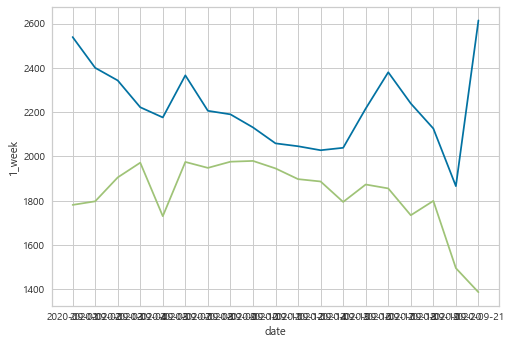

In [24]:
sns.lineplot(x= 'date', y= '1_week', data = pred_0)
sns.lineplot(x= 'date',y = 'Label', data = pred_0)